In [1]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras import layers
from keras.utils import to_categorical

**Load Images**

In [3]:
img_dir = "C:/Users/kaoti/Desktop/Github/OneFish-Disseration-Project/Model/img"

categories =[] # creates categories based on the names of the folders

for x in os.listdir(img_dir):
    categories.append(x)
print(categories[1])

Acipenseridae (Sturgeon)


In [ ]:
#for fishCategory in categories:
    #path = os.path.join(img_dir,fishCategory)
    #for img in os.listdir(path):
        #img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
       # plt.imshow(img_arr, cmap ="gray")
       # plt.show()
       # break
   # break

In [ ]:
#img_size =255 # x and y of reshapping image

#new_arr = cv2.resize(img_arr,(img_size,img_size))
#plt.imshow(new_arr,cmap="gray")
#plt.show()

In [4]:
#loader
batch_size = 32
img_h, img_w = 255,255

trainDS = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(img_h,img_w),
    batch_size= batch_size)

Found 7482 files belonging to 30 classes.
Using 5986 files for training.


In [6]:
class_names = trainDS.class_names
print(class_names)

<class 'list'>


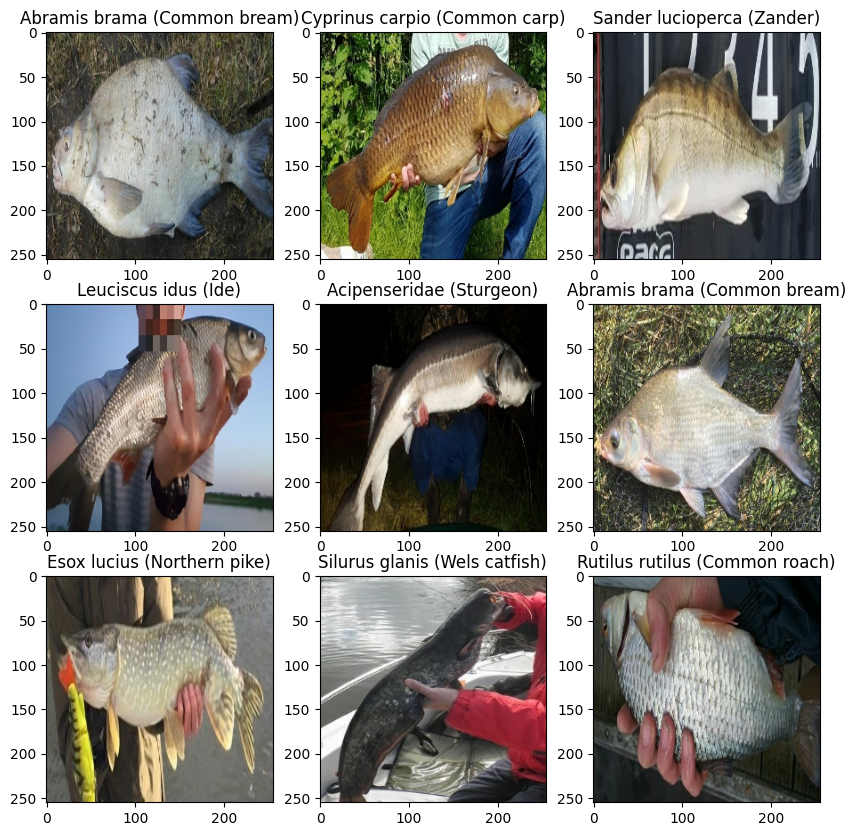

In [12]:
plt.figure(figsize = (10,10))
for images,labels in trainDS.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])